# Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Exploration
- Load the dataset into a Python environment (e.g., Jupyter Notebook).
- Display the first few rows of the dataset to understand its structure.
- Check for missing values and handle them if necessary.
- Summarize basic statistics (mean, median, standard deviation, etc.) for the numeric columns.

## Loading Dataset

In [92]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\DS PROJECTS\BIG PROJECT\LOAN APPROVAL(1)\loan_sanction_test.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Display the first few rows of the dataset to understand its structure.

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


## Check for missing values and handle them if necessary.

In [7]:
print("Missing Values:\n",df.isnull().sum())

Missing Values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [8]:
# Handle missing values 
for column in df.columns:
    if df[column].dtype == "object":
        df[column].fillna(df[column].mode()[0], inplace = True)
    else:
        df[column].fillna(df[column].mean(), inplace = True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_21928\1095935138.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace = True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_21928\1095935138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [12]:
# Recheck missing values after hanling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Summarize basic statistics (mean, median, standard deviation, etc.) for the numeric columns.

In [13]:
print("\nDescriptive Statistics (Numeric Columns):")
display(df.describe())


Descriptive Statistics (Numeric Columns):


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
# Median and Standard Deviation for numeric columns
print("\nMedian values:")
print(df.median(numeric_only = True))


Median values:
ApplicantIncome      3786.0
CoapplicantIncome    1025.0
LoanAmount            126.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64


In [15]:
print("\nStandard Deviation values:")
print(df.std(numeric_only = True))


Standard Deviation values:
ApplicantIncome      4910.685399
CoapplicantIncome    2334.232099
LoanAmount             60.946040
Loan_Amount_Term       64.620366
Credit_History          0.364778
dtype: float64


# Task 2: Data Visualization

# 2.1 Univariate Analysis
- Explore the distribution of numeric columns using the following visualizations:
- Histograms: Plot the frequency distribution of key numeric variables.
- Box Plots: Identify potential outliers and visualize the spread of data.
- Analyze categorical variables by creating the following plots:
- Bar Charts: Visualize the frequency distribution of categorical variables.
- Pie Charts: Represent the composition of categorical variables.


In [9]:
# Set a consistent style
sns.set(style="whitegrid")

# Explore the distribution of numeric columns using the following visualizations:

# Histogram
Plot the frequency distribution of
key numeric variables.

Histogram for Apllicant Income

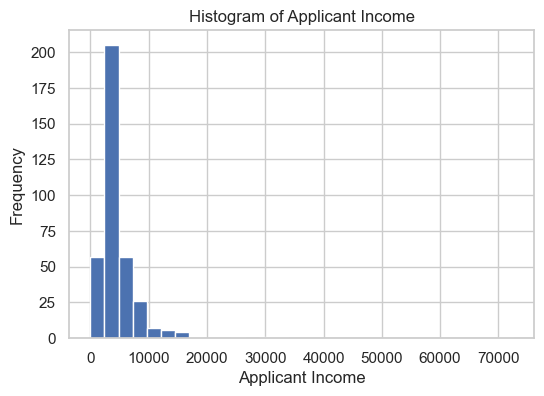

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df['ApplicantIncome'], bins=30)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()


Histogram for Coapplicant Income

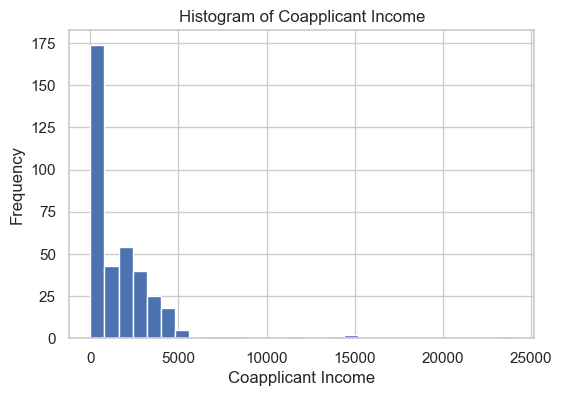

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df['CoapplicantIncome'], bins=30)
plt.title("Histogram of Coapplicant Income")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.show()

Histogram for Loan Amount


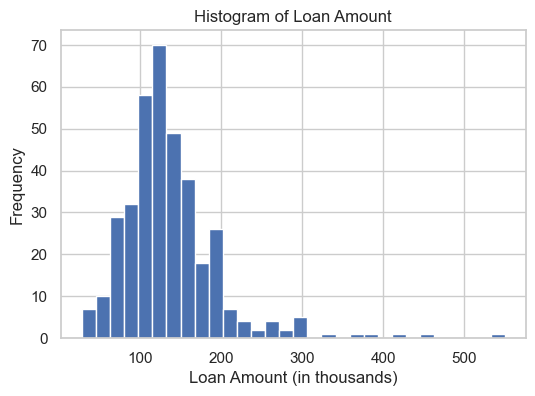

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['LoanAmount'], bins=30)
plt.title("Histogram of Loan Amount")
plt.xlabel("Loan Amount (in thousands)")
plt.ylabel("Frequency")
plt.show()

Histogram for Loan Amount Term


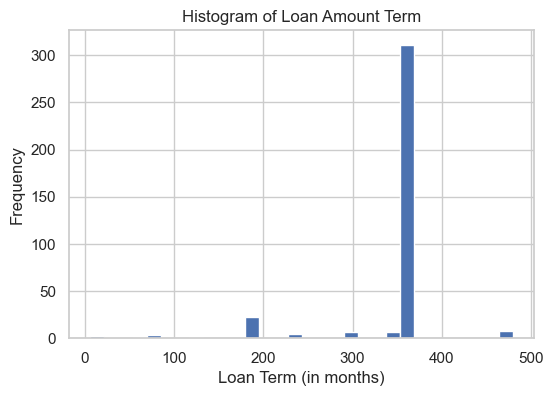

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df['Loan_Amount_Term'], bins=30)
plt.title("Histogram of Loan Amount Term")
plt.xlabel("Loan Term (in months)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
Identify potential outliers and visualize the spread of data.

Boxplot for Applicant Income

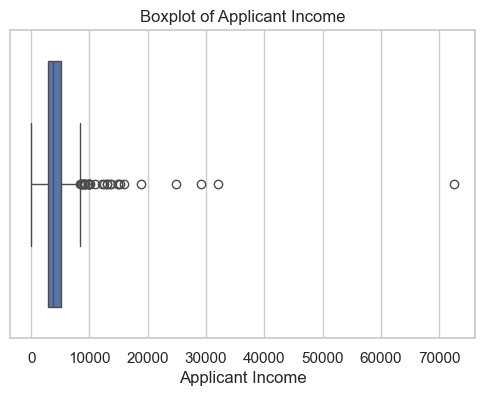

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Boxplot of Applicant Income")
plt.xlabel("Applicant Income")
plt.show()


Boxplot for Coapplicant Income

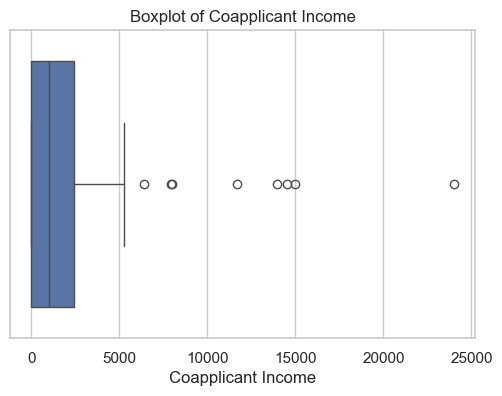

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['CoapplicantIncome'])
plt.title("Boxplot of Coapplicant Income")
plt.xlabel("Coapplicant Income")
plt.show()


Boxplot for Loan Amount

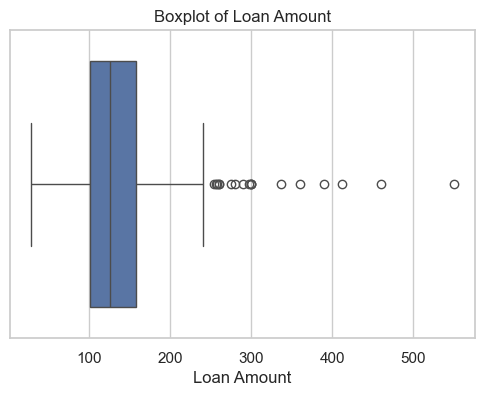

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["LoanAmount"])
plt.title("Boxplot of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

Boxplot for Loan Amount Term

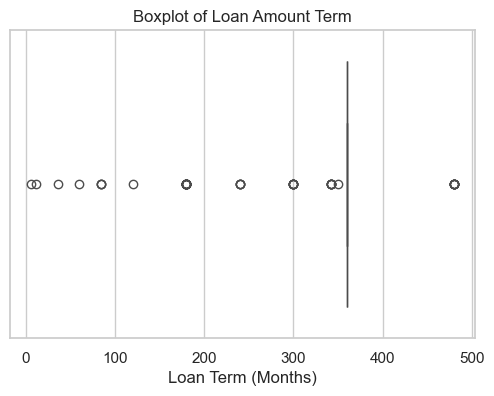

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Loan_Amount_Term'])
plt.title("Boxplot of Loan Amount Term")
plt.xlabel("Loan Term (Months)")
plt.show()


# Analyze categorical variables by creating the following plots:

# Bar Charts: 
Visualize the frequency distribution of categorical variables.

Gender

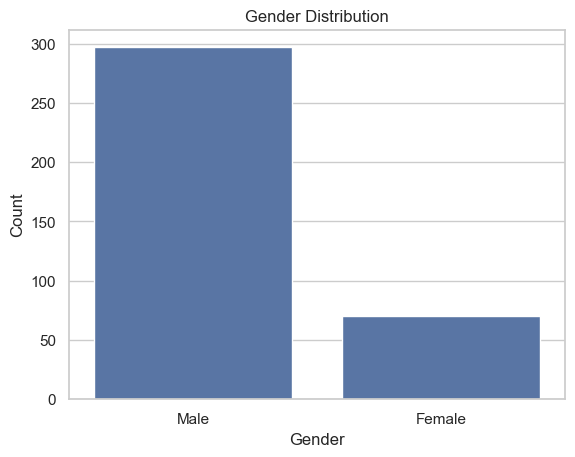

In [30]:
sns.countplot(x="Gender",data = df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Married

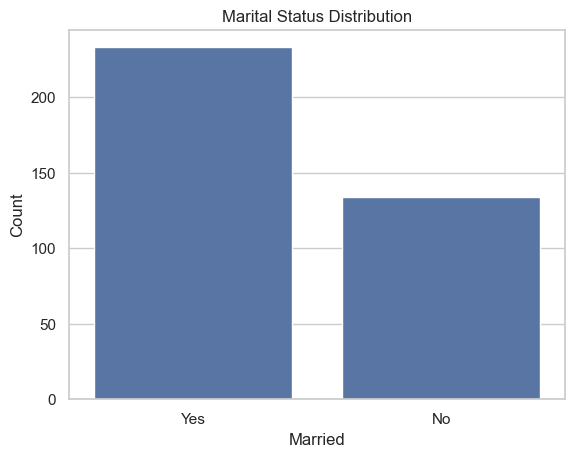

In [31]:
sns.countplot(x="Married",data = df)
plt.title("Marital Status Distribution")
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()

Dependents

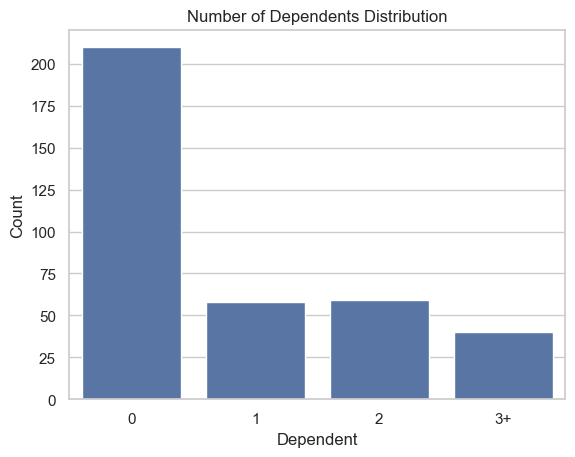

In [32]:
sns.countplot(x="Dependents", data = df)
plt.title("Number of Dependents Distribution")
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.show()

Education

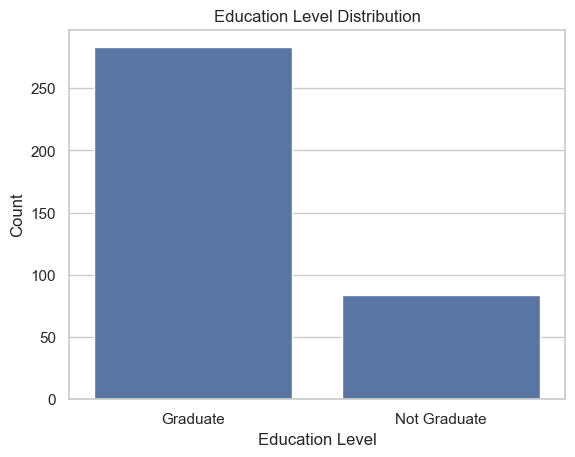

In [34]:
sns.countplot(x="Education", data=df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Self Employed

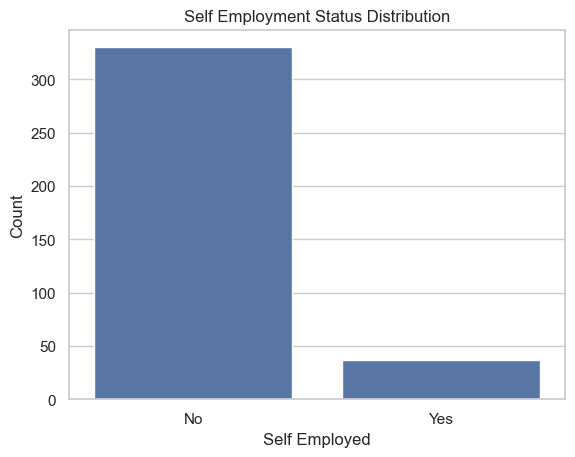

In [35]:
sns.countplot(x="Self_Employed", data =df)
plt.title("Self Employment Status Distribution")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.show()

Credit History

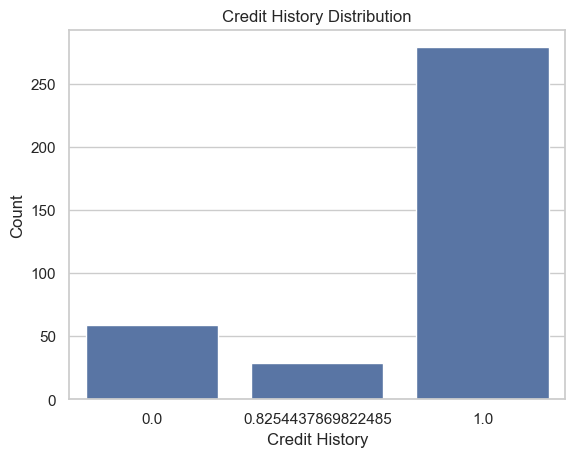

In [37]:
sns.countplot(x="Credit_History", data = df)
plt.title("Credit History Distribution")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()

Property Area

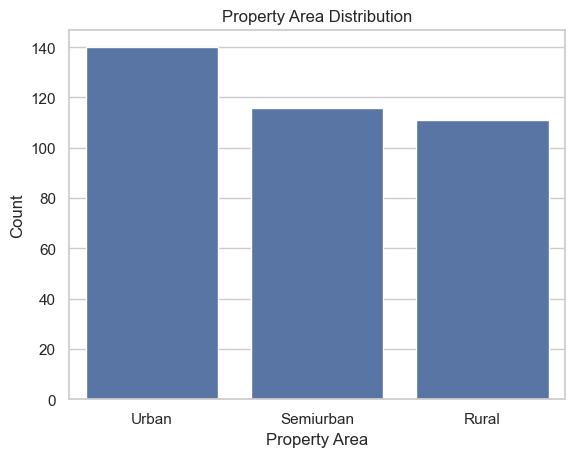

In [39]:
sns.countplot(x="Property_Area", data = df)
plt.title("Property Area Distribution")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

# Pie Charts: Represent the composition of categorical variables.

Gender

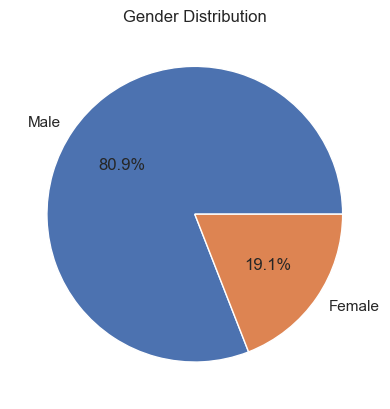

In [41]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


Married

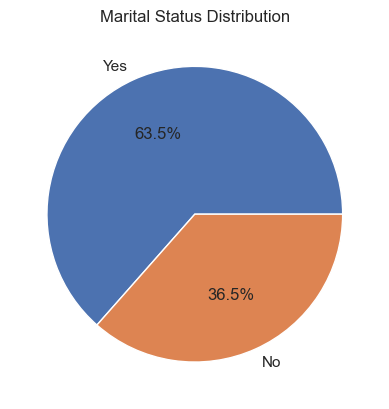

In [42]:
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Marital Status Distribution")
plt.ylabel("")
plt.show()


Dependents

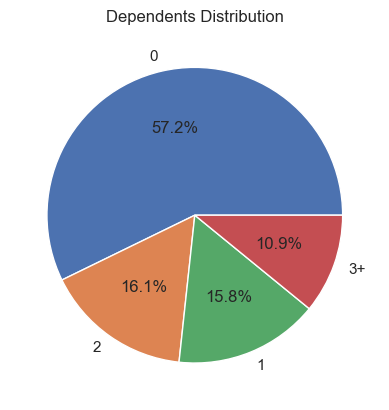

In [43]:
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Dependents Distribution")
plt.ylabel("")
plt.show()


Education

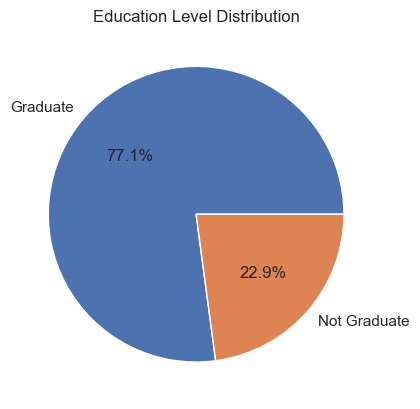

In [44]:
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Education Level Distribution")
plt.ylabel("")
plt.show()


Self Employed

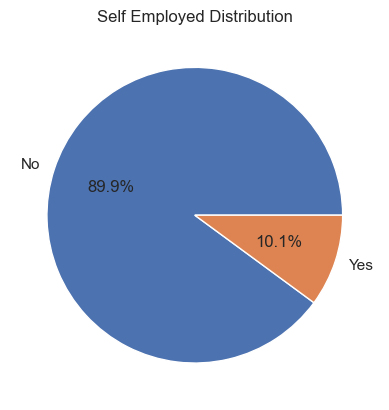

In [45]:
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Self Employed Distribution")
plt.ylabel("")
plt.show()


Credit History

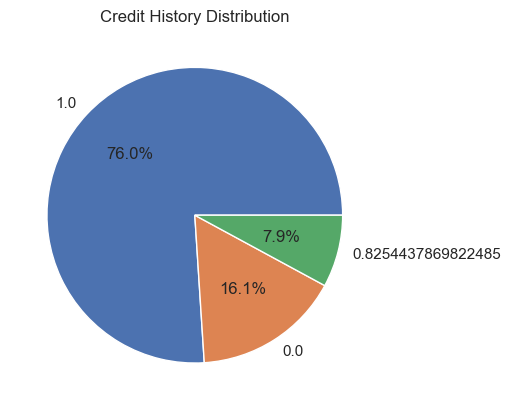

In [46]:
df['Credit_History'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Credit History Distribution")
plt.ylabel("")
plt.show()


Property Area

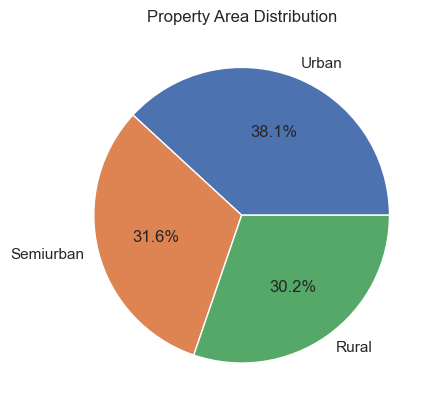

In [47]:
df['Property_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Property Area Distribution")
plt.ylabel("")
plt.show()


# 2.2 Bivariate Analysis
- Create scatter plots to explore relationships between pairs of numeric variables.
- Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.
- Investigate the relationship between categorical and numeric variables using box plots or violin plots.

# Create scatter plots to explore relationships between pairs of numeric variables.

## Scatter Plots

Applicant Income vs Loan Amount

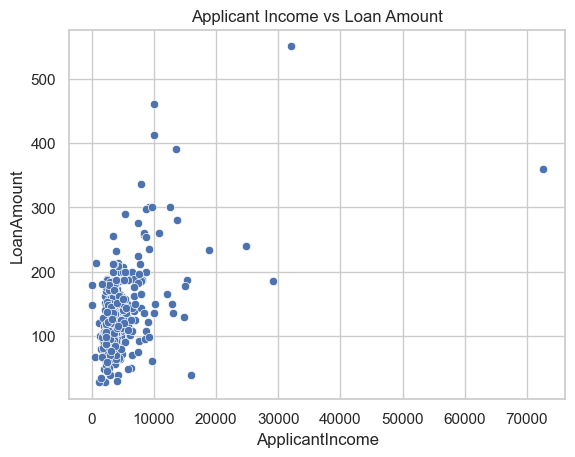

In [54]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title("Applicant Income vs Loan Amount")
plt.show()


Coapplicant Income Vs Loan Amount

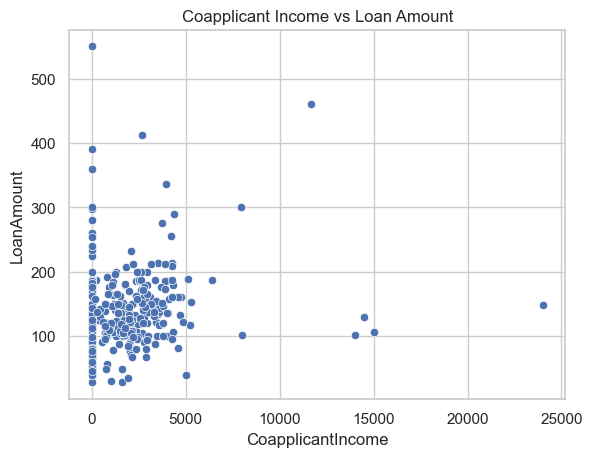

In [55]:
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=df)
plt.title("Coapplicant Income vs Loan Amount")
plt.show()

Applicant Income vs Coapplicant Income

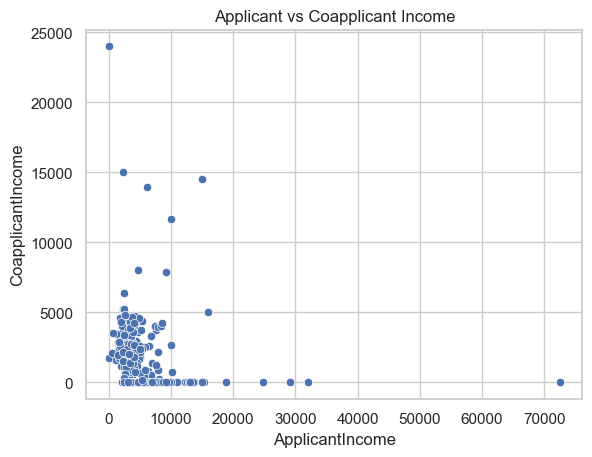

In [56]:
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df)
plt.title("Applicant vs Coapplicant Income")
plt.show()

# Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.

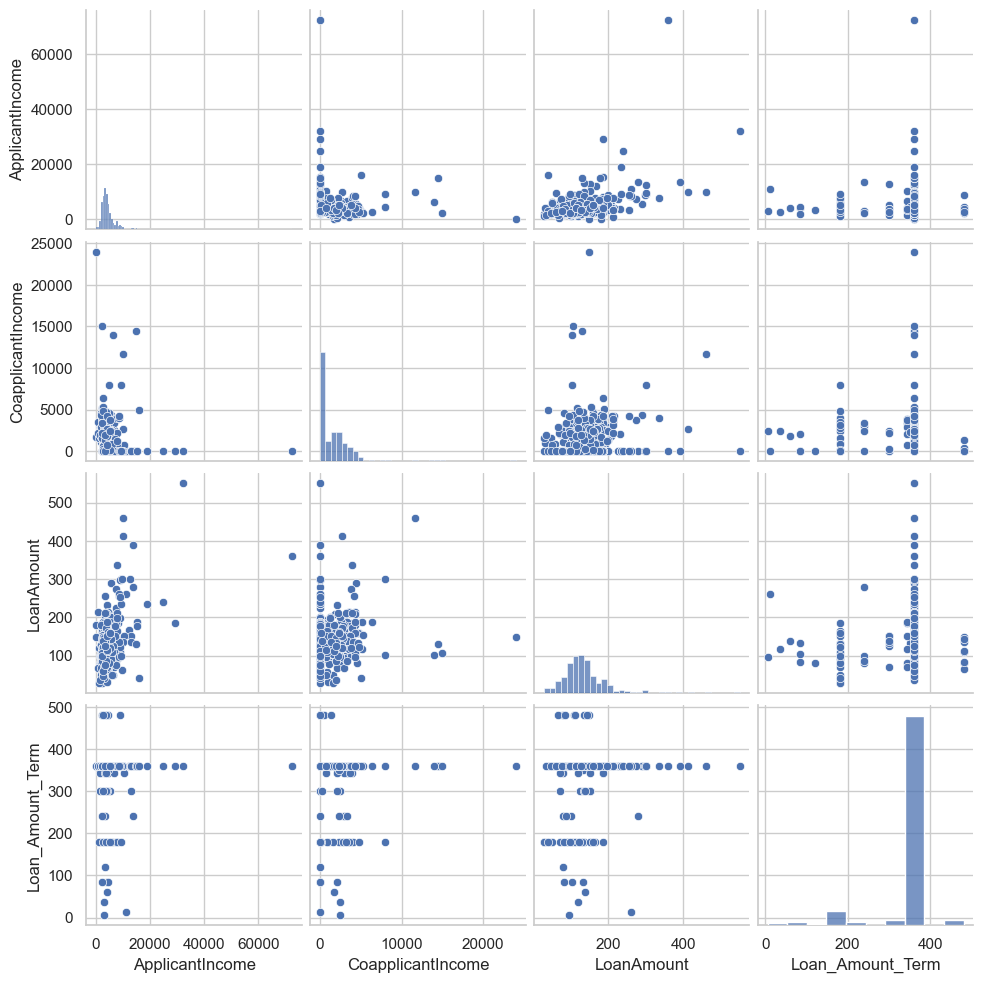

In [63]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

sns.pairplot(df[numeric_cols])
plt.show()

# Investigate the relationship between categorical and numeric variables using box plots or violin plots.

- Box Plots (Categorical vs Numeric)

Education vs Loan Amount

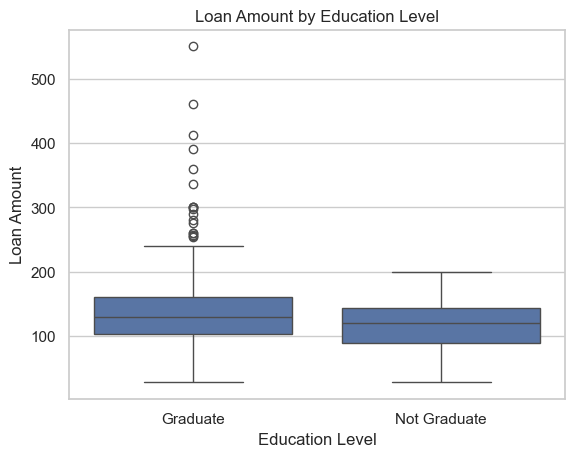

In [65]:
sns.boxplot(x="Education", y="LoanAmount", data = df)
plt.title("Loan Amount by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Loan Amount")
plt.show()

Property Area vs Applicant Income

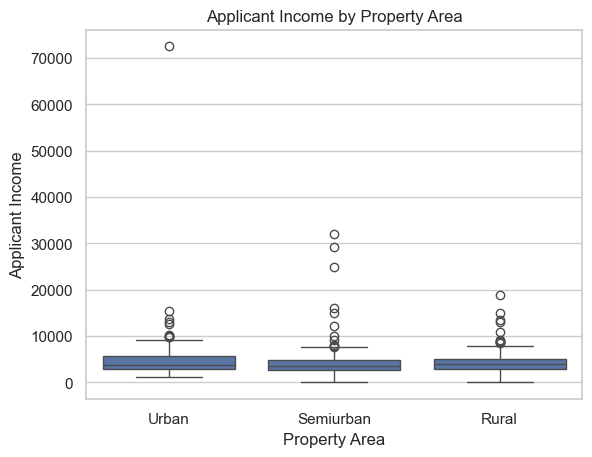

In [66]:
sns.boxplot(x='Property_Area', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Applicant Income")
plt.show()


Credit History vs Loan Amount

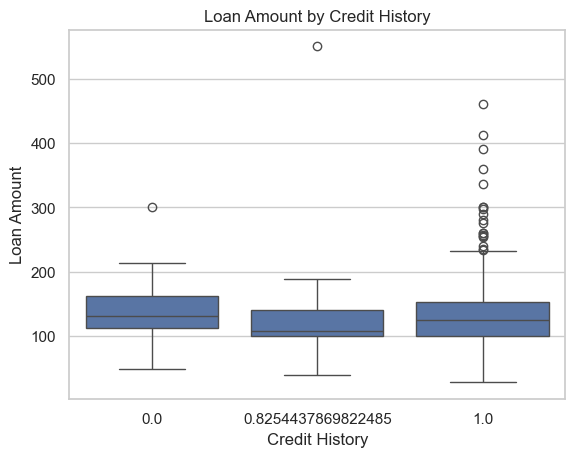

In [67]:
sns.boxplot(x="Credit_History",y="LoanAmount", data = df)
plt.title("Loan Amount by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Loan Amount")
plt.show()

Education vs Loan Amount (Violin Plot)

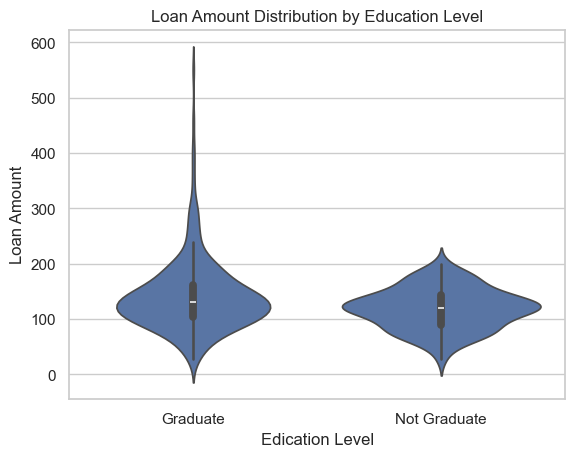

In [68]:
sns.violinplot(x="Education", y="LoanAmount", data = df)
plt.title("Loan Amount Distribution by Education Level")
plt.xlabel("Edication Level")
plt.ylabel("Loan Amount")
plt.show()

Married vs Applicant Income(Violin Plot)

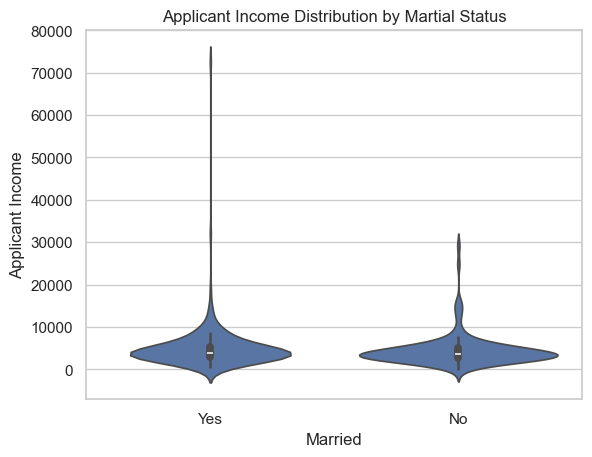

In [70]:
sns.violinplot(x="Married", y="ApplicantIncome", data = df)
plt.title("Applicant Income Distribution by Martial Status")
plt.xlabel("Married")
plt.ylabel("Applicant Income")
plt.show()

# 2.3 Multivariate Analysis Perform a correlation analysis to identify relationships between numeric variables.
- Visualize correlations using a heatmap.
- Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

# Perform a correlation analysis to identify relationships between numeric variables.

# Visualize correlations using a heatmap.

STEP 1
SELECT NUMERIC VARIABLE

In [72]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


STEP 2 COMPUTE CORRELATION MATRIX

In [74]:
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023187,0.094083
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.010940,-0.066798
LoanAmount,0.490174,0.150112,1.000000,0.093856,-0.011405
Loan_Amount_Term,0.023187,-0.010940,0.093856,1.000000,-0.052370
Credit_History,0.094083,-0.066798,-0.011405,-0.052370,1.000000


STEP 3 VISUALIZE USING HEATMAP

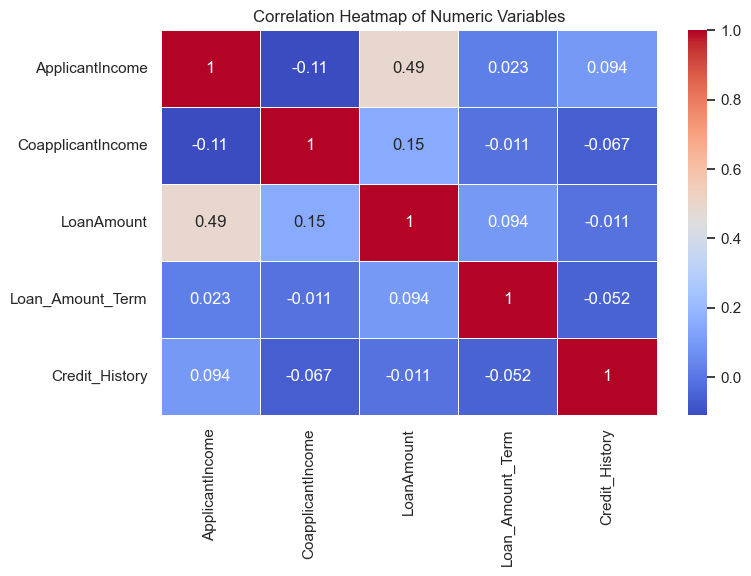

In [75]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


# Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

## Property Area vs Loan Status

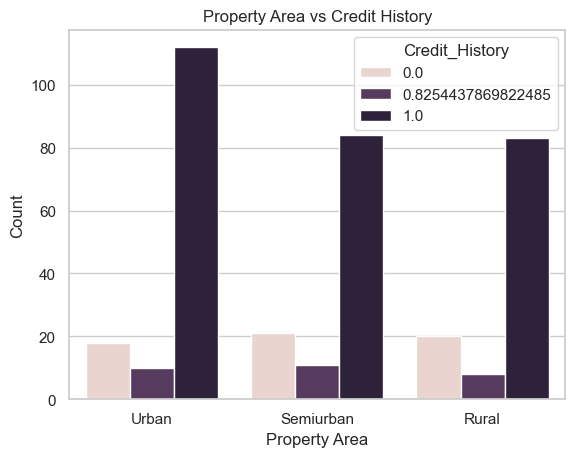

In [89]:
sns.countplot(x="Property_Area", hue="Credit_History", data=df)
plt.title("Property Area vs Credit History")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

# Task 3: Geospatial Analysis (Optional)
- If the dataset contains geographical information, visualize data on a map to identify regional trends.
- Use scatter plots or heatmaps to display data patterns across geographic locations.

# If the dataset contains geographical information, visualize data on a map to identify regional trends.

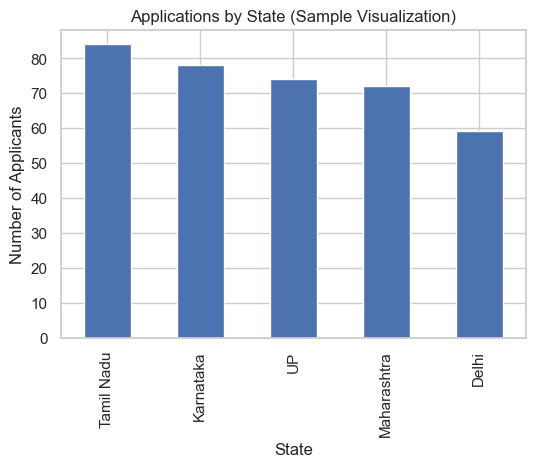

In [97]:
# Adding hypothetical locations just for visualization purpose

df['State'] = np.random.choice(['Delhi', 'UP', 'Maharashtra', 'Karnataka', 'Tamil Nadu'], size=len(df))

state_counts = df['State'].value_counts()

state_counts.plot(kind='bar', figsize=(6,4))
plt.title("Applications by State (Sample Visualization)")
plt.xlabel("State")
plt.ylabel("Number of Applicants")
plt.show()


# Use scatter plots or heatmaps to display data patterns across geographic locations.

Scatter Plot Across Regions (Using Numeric Variable + Region)

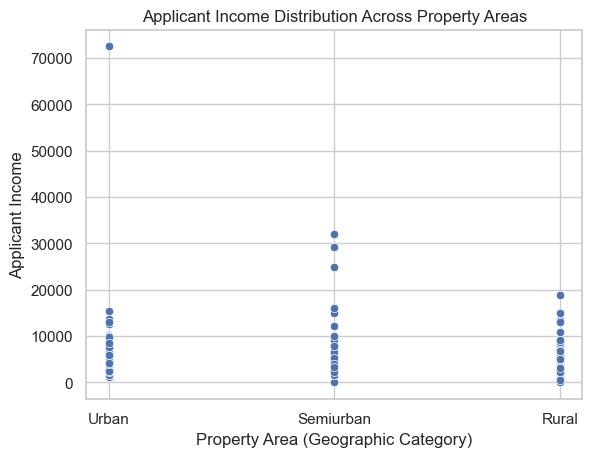

In [100]:
sns.scatterplot(x='Property_Area', y='ApplicantIncome', data=df)
plt.title("Applicant Income Distribution Across Property Areas")
plt.xlabel("Property Area (Geographic Category)")
plt.ylabel("Applicant Income")
plt.show()


Scatter Plot with Loan Amount (Optional Additional Plot)

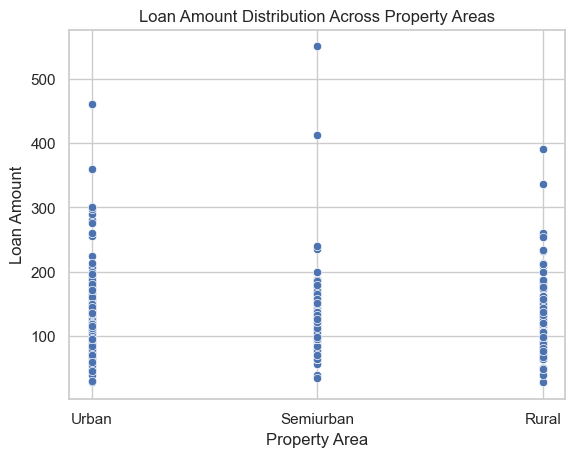

In [101]:
sns.scatterplot(x='Property_Area', y='LoanAmount', data=df)
plt.title("Loan Amount Distribution Across Property Areas")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()


# Key Insights from the Loan Approval Data

- Credit History Influence

Applicants with Credit_History = 1 have a much higher chance of loan approval compared to those with no credit history. This shows that previous repayment behavior is the main factor in approval decisions.

- Regional Trends (Property_Area)

Urban and Semi-Urban applicants receive more loan approvals than Rural applicants. This may be due to better financial stability, job opportunities, and stronger banking support in developed regions.

- Applicant Income vs Loan Amount

There is a weak positive relationship between ApplicantIncome and LoanAmount, meaning higher income applicants tend to request or receive slightly larger loans, but income alone is not the deciding factor.

- Co-applicant Income Impact

CoapplicantIncome shows very low correlation with loan approval and loan amount. This means that coapplicant income is not heavily considered in the decision-making process.

- Education Level Effect

Applicants with Graduate education tend to have a higher chance of loan approval and slightly higher loan amounts than Non-Graduates, suggesting education improves perceived repayment capability.

- Loan Term Preference

Most applicants choose long-term repayment plans (360 months) to reduce monthly EMI pressure, indicating borrowers prefer manageable monthly payments even though it increases total interest.

# Conclusion

This exploratory data analysis reveals that credit history is the most influential factor in loan approvals, outweighing income and education variables. While higher applicant income does correlate with higher loan amounts to some extent, the approval decision is primarily based on the borrower’s past repayment reliability. Geographic trends show that Urban and Semi-Urban applicants receive more approvals, which may be associated with stronger banking access and stable employment opportunities in these areas. Overall, the analysis indicates that lenders prioritize risk minimization and financial credibility rather than solely focusing on earnings or demographic characteristics.